In [8]:
import torch
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [9]:
print("test")

test


In [10]:
X = torch.rand(1000,5)
Y = torch.rand(1000)

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [12]:
X = X.to(device)
Y = Y.to(device)

In [13]:
import torch.nn as nn

class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()   # we are now able to take advantage of all the pre-built functionalities that have been written for nn.Module.
        self.input_to_hidden_layer = nn.Linear(5,100)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_layer_2 = nn.Linear(100,100)
        self.hidden_layer_2_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(100,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_layer_2(x)
        x = self.hidden_layer_2_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [14]:
mynet = MyNeuralNet().to(device)

In [15]:
loss_func = nn.MSELoss()

In [16]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(0.4149, device='cuda:0', grad_fn=<MseLossBackward0>)


C:\Users\dunga\AppData\Roaming\Python\Python311\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [17]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

C:\Users\dunga\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
loss_history = []
for i in range(300):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())
    print(f"Epoch: {i+1}, Loss: {loss_value.item()}")

C:\Users\dunga\AppData\Roaming\Python\Python311\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1, Loss: 0.4149329364299774
Epoch: 2, Loss: 0.4101167619228363
Epoch: 3, Loss: 0.4053751528263092
Epoch: 4, Loss: 0.40070709586143494
Epoch: 5, Loss: 0.3961113393306732
Epoch: 6, Loss: 0.3915872573852539
Epoch: 7, Loss: 0.38713374733924866
Epoch: 8, Loss: 0.38274866342544556
Epoch: 9, Loss: 0.3784307539463043
Epoch: 10, Loss: 0.37417885661125183
Epoch: 11, Loss: 0.3699910640716553
Epoch: 12, Loss: 0.3658657371997833
Epoch: 13, Loss: 0.36180293560028076
Epoch: 14, Loss: 0.3578008711338043
Epoch: 15, Loss: 0.3538585603237152
Epoch: 16, Loss: 0.34997493028640747
Epoch: 17, Loss: 0.3461493253707886
Epoch: 18, Loss: 0.3423807621002197
Epoch: 19, Loss: 0.33866769075393677
Epoch: 20, Loss: 0.33500969409942627
Epoch: 21, Loss: 0.3314054310321808
Epoch: 22, Loss: 0.3278540074825287
Epoch: 23, Loss: 0.3243549168109894
Epoch: 24, Loss: 0.32090744376182556
Epoch: 25, Loss: 0.3175106942653656
Epoch: 26, Loss: 0.3141637444496155
Epoch: 27, Loss: 0.3108654320240021
Epoch: 28, Loss: 0.307614743

Epoch: 285, Loss: 0.08833721280097961
Epoch: 286, Loss: 0.08826715499162674
Epoch: 287, Loss: 0.0881982073187828
Epoch: 288, Loss: 0.08813036233186722
Epoch: 289, Loss: 0.08806359022855759
Epoch: 290, Loss: 0.0879979059100151
Epoch: 291, Loss: 0.087933249771595
Epoch: 292, Loss: 0.08786962926387787
Epoch: 293, Loss: 0.08780702948570251
Epoch: 294, Loss: 0.08774542063474655
Epoch: 295, Loss: 0.08768480271100998
Epoch: 296, Loss: 0.08762515336275101
Epoch: 297, Loss: 0.08756645023822784
Epoch: 298, Loss: 0.08750870078802109
Epoch: 299, Loss: 0.08745187520980835
Epoch: 300, Loss: 0.08739595115184784


Text(0, 0.5, 'loss value')

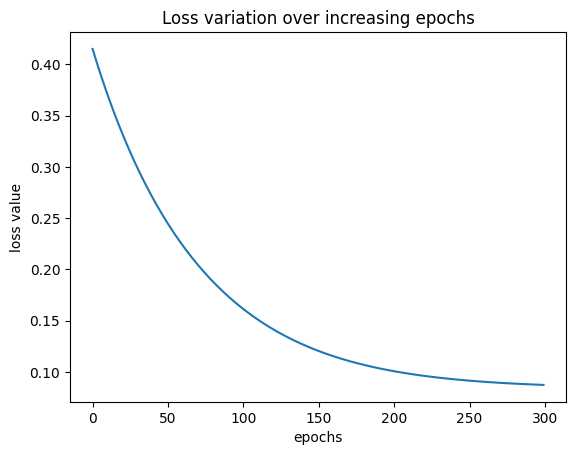

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

In [20]:
mynet = MyNeuralNet().to(device)

In [21]:
print(mynet.input_to_hidden_layer.weight)
print(mynet.input_to_hidden_layer.bias)

Parameter containing:
tensor([[ 9.2681e-02, -3.1188e-01, -2.1247e-01, -3.0082e-01, -1.8814e-01],
        [ 7.4453e-02,  2.2697e-01,  1.2732e-01,  2.9651e-01,  2.8522e-01],
        [ 5.6444e-02, -3.7787e-01, -6.6439e-02,  4.3035e-01,  1.1733e-01],
        [-1.4628e-01,  5.5723e-02, -3.1923e-02,  4.1085e-01, -2.5471e-01],
        [-9.9050e-02, -3.8604e-01,  3.8658e-01, -1.5565e-02,  1.9478e-03],
        [-3.4437e-01,  2.8278e-01,  3.6214e-01,  3.9362e-01, -1.1364e-01],
        [ 2.9130e-01,  1.2264e-01,  9.4997e-02, -1.2700e-01, -3.4083e-01],
        [ 3.1696e-01,  1.2205e-01, -2.4862e-01,  1.1148e-01,  1.0513e-01],
        [-3.4167e-01,  1.2674e-01,  3.5168e-01, -1.0283e-02,  3.6244e-01],
        [-4.1173e-01,  1.7500e-01,  3.1832e-01,  1.2046e-02,  3.7592e-01],
        [ 4.9345e-02, -1.2384e-02,  2.7843e-01, -1.6652e-01,  3.9024e-01],
        [-1.7314e-02,  4.2798e-01,  1.0400e-01,  1.7678e-01,  2.7113e-01],
        [-1.1489e-01, -3.4564e-01,  3.6174e-01, -4.0631e-01, -1.8176e-01],
   

In [22]:
mynet.parameters()

<generator object Module.parameters at 0x0000016F2DE59000>

In [23]:
for par in mynet.parameters():
    print(par)

Parameter containing:
tensor([[ 9.2681e-02, -3.1188e-01, -2.1247e-01, -3.0082e-01, -1.8814e-01],
        [ 7.4453e-02,  2.2697e-01,  1.2732e-01,  2.9651e-01,  2.8522e-01],
        [ 5.6444e-02, -3.7787e-01, -6.6439e-02,  4.3035e-01,  1.1733e-01],
        [-1.4628e-01,  5.5723e-02, -3.1923e-02,  4.1085e-01, -2.5471e-01],
        [-9.9050e-02, -3.8604e-01,  3.8658e-01, -1.5565e-02,  1.9478e-03],
        [-3.4437e-01,  2.8278e-01,  3.6214e-01,  3.9362e-01, -1.1364e-01],
        [ 2.9130e-01,  1.2264e-01,  9.4997e-02, -1.2700e-01, -3.4083e-01],
        [ 3.1696e-01,  1.2205e-01, -2.4862e-01,  1.1148e-01,  1.0513e-01],
        [-3.4167e-01,  1.2674e-01,  3.5168e-01, -1.0283e-02,  3.6244e-01],
        [-4.1173e-01,  1.7500e-01,  3.1832e-01,  1.2046e-02,  3.7592e-01],
        [ 4.9345e-02, -1.2384e-02,  2.7843e-01, -1.6652e-01,  3.9024e-01],
        [-1.7314e-02,  4.2798e-01,  1.0400e-01,  1.7678e-01,  2.7113e-01],
        [-1.1489e-01, -3.4564e-01,  3.6174e-01, -4.0631e-01, -1.8176e-01],
   

### Dataset, DataLoader, and batch size

One hyperparameter in a neural network that we have not considered yet is the batch size. Batch size refers to the number of data points considered to calculate the loss value or update weights.

This hyperparameter especially comes in handy in scenarios where there are millions of data points, and using all of them for one instance of weight update is not optimal, as memory is not available to hold so much information. In addition, a sample can be representative enough of the data. Batch size helps in fetching multiple samples of data that are representative enough, but not necessarily 100% representative of the total data.

In [35]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

In [36]:
X = torch.rand(1000,5)
Y = torch.rand(1000)

In [37]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [38]:
class MyDataset(Dataset):
    def __init__(self,x,y):
        self.x = torch.tensor(x).float()
        self.y = torch.tensor(y).float()
    def __len__(self):
        return len(self.x)
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

In [39]:
ds = MyDataset(X, Y)

C:\Users\dunga\AppData\Local\Temp\ipykernel_58224\1858454956.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.x = torch.tensor(x).float()
C:\Users\dunga\AppData\Local\Temp\ipykernel_58224\1858454956.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y).float()


In [40]:
dl = DataLoader(ds, batch_size=100, shuffle=True)

In [41]:
for x,y in dl:
    print(x,y)

tensor([[0.0356, 0.8854, 0.8705, 0.1069, 0.6983],
        [0.5554, 0.5747, 0.0836, 0.1457, 0.3016],
        [0.7573, 0.7112, 0.2159, 0.6587, 0.8525],
        [0.6335, 0.3680, 0.5482, 0.8768, 0.9027],
        [0.2630, 0.8841, 0.2959, 0.7216, 0.9437],
        [0.5616, 0.6772, 0.7490, 0.0282, 0.7207],
        [0.6820, 0.3266, 0.6393, 0.6226, 0.4068],
        [0.6811, 0.9867, 0.1100, 0.3735, 0.6346],
        [0.7122, 0.1530, 0.7643, 0.1295, 0.9335],
        [0.8931, 0.5758, 0.5609, 0.1267, 0.7466],
        [0.7395, 0.8574, 0.8483, 0.9347, 0.1293],
        [0.3690, 0.7651, 0.9811, 0.2944, 0.2856],
        [0.2047, 0.3268, 0.5828, 0.0168, 0.1676],
        [0.4437, 0.8832, 0.3603, 0.4182, 0.4199],
        [0.9514, 0.5693, 0.4018, 0.8546, 0.4136],
        [0.1572, 0.8954, 0.7930, 0.2290, 0.3439],
        [0.3166, 0.8464, 0.9029, 0.4485, 0.3144],
        [0.1799, 0.3108, 0.9929, 0.4571, 0.5652],
        [0.6817, 0.1997, 0.6320, 0.6741, 0.0444],
        [0.0965, 0.2206, 0.1548, 0.5544, 0.9007],


tensor([[0.2374, 0.4247, 0.2808, 0.4235, 0.1609],
        [0.4877, 0.1537, 0.8989, 0.0514, 0.0464],
        [0.6471, 0.9109, 0.4513, 0.2818, 0.1625],
        [0.8502, 0.2301, 0.8148, 0.4581, 0.3297],
        [0.2512, 0.6533, 0.5616, 0.9523, 0.7811],
        [0.8030, 0.0880, 0.4027, 0.3277, 0.7095],
        [0.5563, 0.1884, 0.5440, 0.6140, 0.0307],
        [0.9960, 0.7971, 0.7456, 0.9227, 0.4540],
        [0.1698, 0.7032, 0.3084, 0.7670, 0.2663],
        [0.2343, 0.6992, 0.6254, 0.0994, 0.9560],
        [0.6659, 0.2764, 0.3693, 0.7504, 0.6726],
        [0.2132, 0.0355, 0.4582, 0.4098, 0.3048],
        [0.8939, 0.5163, 0.7803, 0.0877, 0.3431],
        [0.3082, 0.5355, 0.0715, 0.7900, 0.4628],
        [0.0174, 0.9617, 0.3494, 0.7517, 0.5989],
        [0.9646, 0.4188, 0.9170, 0.7227, 0.6904],
        [0.6920, 0.3431, 0.2672, 0.6334, 0.8433],
        [0.5022, 0.1380, 0.6301, 0.0304, 0.0933],
        [0.3725, 0.7398, 0.6790, 0.6550, 0.8650],
        [0.3649, 0.0476, 0.4349, 0.3485, 0.4610],


In [42]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()   # we are now able to take advantage of all the pre-built functionalities that have been written for nn.Module.
        self.input_to_hidden_layer = nn.Linear(5,100)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_layer_2 = nn.Linear(100,100)
        self.hidden_layer_2_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(100,1)
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_layer_2(x)
        x = self.hidden_layer_2_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [43]:
mynet = MyNeuralNet().to(device)
loss_func = nn.MSELoss()
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

In [44]:
import time
loss_history = []
start = time.time()
for i in range(50):
    for data in dl:
        x, y = data
        opt.zero_grad()
        loss_value = loss_func(mynet(x),y)
        loss_value.backward()
        opt.step()
    loss_history.append(loss_value.item())
    print(f"Epoch: {i+1}, Loss: {loss_value.item()}")
end = time.time()
print(end - start)

C:\Users\dunga\AppData\Roaming\Python\Python311\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1, Loss: 0.20432062447071075
Epoch: 2, Loss: 0.22551073133945465
Epoch: 3, Loss: 0.18496011197566986
Epoch: 4, Loss: 0.1975233107805252
Epoch: 5, Loss: 0.17161418497562408
Epoch: 6, Loss: 0.19062434136867523
Epoch: 7, Loss: 0.16335918009281158
Epoch: 8, Loss: 0.16255100071430206
Epoch: 9, Loss: 0.15037131309509277
Epoch: 10, Loss: 0.12010420858860016
Epoch: 11, Loss: 0.13045065104961395
Epoch: 12, Loss: 0.12060744315385818
Epoch: 13, Loss: 0.13622434437274933
Epoch: 14, Loss: 0.1174725890159607
Epoch: 15, Loss: 0.12469609081745148
Epoch: 16, Loss: 0.10019031912088394
Epoch: 17, Loss: 0.0966009795665741
Epoch: 18, Loss: 0.11916442215442657
Epoch: 19, Loss: 0.1242760717868805
Epoch: 20, Loss: 0.10097915679216385
Epoch: 21, Loss: 0.09708476066589355
Epoch: 22, Loss: 0.12481781840324402
Epoch: 23, Loss: 0.09753471612930298
Epoch: 24, Loss: 0.09022610634565353
Epoch: 25, Loss: 0.08203304558992386
Epoch: 26, Loss: 0.08700447529554367
Epoch: 27, Loss: 0.09207095205783844
Epoch: 28, Los

Text(0, 0.5, 'loss value')

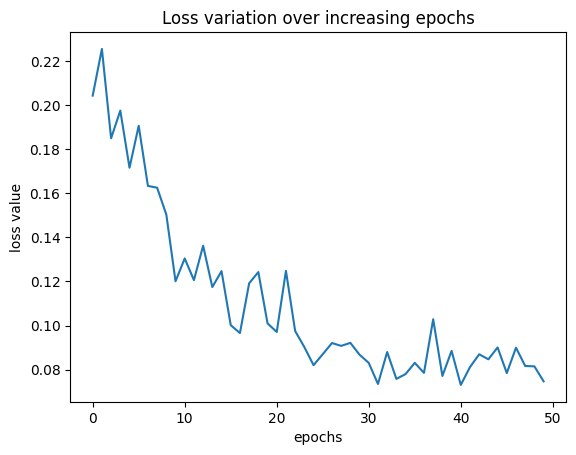

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')